In [1]:
import random
import urllib
import warnings
import pandas as pd
import numpy as np
import time
from faker import Faker
import matplotlib.pyplot as plt
from scipy.stats import beta
import datetime
import seaborn as sns
import os

In [13]:
def s_name(n=100, r_seed=100):
    Faker.seed(r_seed)
    faker = Faker()
    names = []
    for x in range(n):
        names.append('{}'.format(faker.name()))
    return names

def s_grade(n=100, shift=5, skewness=2, r_seed=100):
    np.random.seed(r_seed)
    rand = beta.rvs(shift, skewness, size=n) * 100  #Skewnorm function
    return rand

def s_dates(n=100, start='2020-01-01', end='2020-01-02', r_seed=100):
    np.random.seed(r_seed)
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    start_u = start.value//10**9
    end_u = end.value//10**9
    date_list = pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
    string_dlist = [str(x) for x in list(date_list)]
    return date_list, string_dlist


def s_id(n=100, length=5, r_seed=100):
    random.seed(r_seed)
    ids = []
    for x in range(n):
        ids.append('ID'+ str(random.randint(10000, 99999)))
    return ids

def time_spent(n=100, r_seed=100):
    random.seed(r_seed)
    numbers = []
    for x in range(n):
        numbers.append(random.randint(0, 40))
    return numbers

In [14]:
def generate_data(num=30, start_time='2020-01-01', end_time='2020-01-01 23:59:59', due_date='2020-01-01 22:00:00', 
                  shift=10, skewness = 2, func_seed = 80, class_name='Chemistry'):

    ids = s_id(n=num, r_seed=func_seed)
    names = s_name(n=num, r_seed=func_seed)
    dates  = s_dates(n=num, start=start_time, end=end_time)
    timespent = time_spent(n=num, r_seed=func_seed)
    clean_grades = map(int, [x for x in s_grade(n=num, shift=shift, skewness=skewness, r_seed=func_seed)])
    
    data = pd.DataFrame(data={'ID':ids, 'Name':names, 'Score': clean_grades, 'Submission TimeStamp':dates[0], 'Time spent(minute)':timespent })
    data['Status'] = ['Late' if data['Submission TimeStamp'][t].value > pd.to_datetime(due_date).value else 'On Time' for t in range(len(data['Submission TimeStamp']))]
    data.loc[(data['Status'] == 'Late') & (data['Score'] <= 50), 'Status'] = 'Missing'
    data.loc[data['Status'] == 'Missing', ['Score', 'Submission TimeStamp', 'Time spent(minute)']] = 0
    data['Grade'] = ['A' if (100 >= x >=85)  else 'B' if (84>= x >=75) else 'C' if (74>= x >= 65) else 'D' if (64 >= x >= 40) else 'F' for x in data['Score']]
    data['Class'] = class_name
    return data 

In [15]:
assignment1 = generate_data(num=100, shift=10, skewness=2, func_seed=100)

student consistency i.e. probability of next grade, naive bayes


In [16]:
assignment1

,ID,Name,Score,Submission TimeStamp,Time spent(minute),Status,Grade,Class
0,ID29093,Jesse Townsend,70,2020-01-01 10:40:08,9,On Time,C,Chemistry
1,ID70231,Monique Hamilton,84,2020-01-01 15:34:48,29,On Time,B,Chemistry
2,ID69628,Kim Miller,81,2020-01-01 22:08:03,29,Late,B,Chemistry
3,ID32904,Anthony Fitzpatrick,78,2020-01-01 21:34:15,11,On Time,B,Chemistry
4,ID61515,Gabriela Parker,88,2020-01-01 18:13:35,25,On Time,A,Chemistry
5,ID55840,Christina White,93,2020-01-01 22:44:00,22,Late,A,Chemistry
6,ID66821,Gregory Sims,77,2020-01-01 17:36:10,27,On Time,B,Chemistry
7,ID76435,Christine Blanchard,76,2020-01-01 22:51:10,32,Late,B,Chemistry
8,ID24413,Stephanie Meyers,83,2020-01-01 03:57:40,7,On Time,B,Chemistry
9,ID79848,Matthew Martinez,71,2020-01-01 21:00:18,34,On Time,C,Chemistry


In [17]:
assignment1[assignment1['Status'] == 'Missing']

,ID,Name,Score,Submission TimeStamp,Time spent(minute),Status,Grade,Class
82,ID86373,Lisa Mcconnell,0,0,0,Missing,F,Chemistry


In [18]:
pd.set_option('display.max_rows', None)
assignment1

,ID,Name,Score,Submission TimeStamp,Time spent(minute),Status,Grade,Class
0,ID29093,Jesse Townsend,70,2020-01-01 10:40:08,9,On Time,C,Chemistry
1,ID70231,Monique Hamilton,84,2020-01-01 15:34:48,29,On Time,B,Chemistry
2,ID69628,Kim Miller,81,2020-01-01 22:08:03,29,Late,B,Chemistry
3,ID32904,Anthony Fitzpatrick,78,2020-01-01 21:34:15,11,On Time,B,Chemistry
4,ID61515,Gabriela Parker,88,2020-01-01 18:13:35,25,On Time,A,Chemistry
5,ID55840,Christina White,93,2020-01-01 22:44:00,22,Late,A,Chemistry
6,ID66821,Gregory Sims,77,2020-01-01 17:36:10,27,On Time,B,Chemistry
7,ID76435,Christine Blanchard,76,2020-01-01 22:51:10,32,Late,B,Chemistry
8,ID24413,Stephanie Meyers,83,2020-01-01 03:57:40,7,On Time,B,Chemistry
9,ID79848,Matthew Martinez,71,2020-01-01 21:00:18,34,On Time,C,Chemistry


C:\Users\hamza\Anaconda3\envs\dataviz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


71.54411049428427

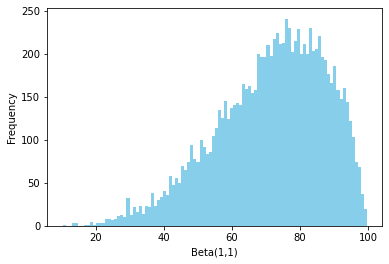

In [19]:
data_beta = beta.rvs(5, 2, size=10000) * 100
ax = sns.distplot(data_beta,
                  kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(1,1)', ylabel='Frequency')
data_beta.mean()

In [20]:
#def randomizer(num, 'high', 'medium', 'low'):
#    quiz_dict = {}
#    low = [10, 2]
#    medium = [5, 2]
#    high = [5, 5]
#    generate_data(num=num, shift=5, skewness=2, func_seed=99)
#    return quiz_dict

In [21]:
to_csv_data = assignment1.to_csv('assignment_1.csv', index = True)

In [9]:
!pip freeze > requirements.txt

In [ ]:
!conda create --name dataviz --file requirements.txt